# Diamond Price Prediction


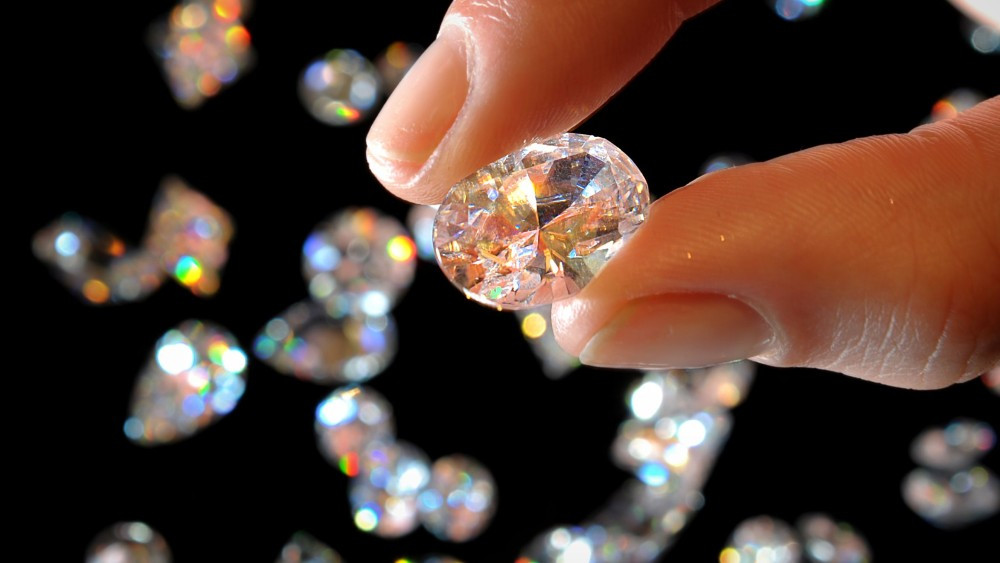

In [1]:
from IPython import display 
display.Image("C:/Users/Urmisha/Desktop/Udemy ML & AI/ML Regression Course Package/diamonds.jpg", width=1000, height=15)

In [2]:
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
diamond_data=pd.read_csv("\\diamond_prices.csv")
diamond_data.head(n=10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [4]:
#Descriptive Statistics
print(diamond_data.shape)
print(diamond_data.size)
print(diamond_data.info())
print(diamond_data.describe())

(53940, 11)
593340
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
Unnamed: 0    53940 non-null int64
carat         53940 non-null float64
cut           53940 non-null object
color         53940 non-null object
clarity       53940 non-null object
depth         53940 non-null float64
table         53940 non-null float64
price         53940 non-null int64
x             53940 non-null float64
y             53940 non-null float64
z             53940 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB
None
         Unnamed: 0         carat         depth         table         price  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean   26970.500000      0.797940     61.749405     57.457184   3932.799722   
std    15571.281097      0.474011      1.432621      2.234491   3989.439738   
min        1.000000      0.200000     43.000000     43.000000    326.000000   
25%    134

In [5]:
diamond_data.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [6]:
diamond_data=diamond_data.drop(['Unnamed: 0'], axis=1)

In [7]:
diamond_data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [8]:
diamond_data.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

**Numerical Variables Analysis

(array([2.5155e+04, 1.8626e+04, 7.1290e+03, 2.3490e+03, 6.1400e+02,
        5.3000e+01, 6.0000e+00, 5.0000e+00, 2.0000e+00, 1.0000e+00]),
 array([0.2  , 0.681, 1.162, 1.643, 2.124, 2.605, 3.086, 3.567, 4.048,
        4.529, 5.01 ]),
 <a list of 10 Patch objects>)

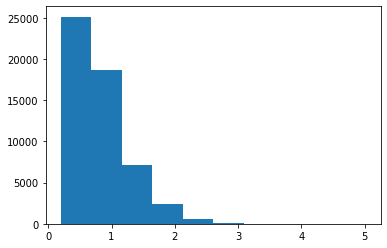

In [9]:
#Histogram of Carat
plt.hist(diamond_data['carat'])

C:\Users\Urmisha\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


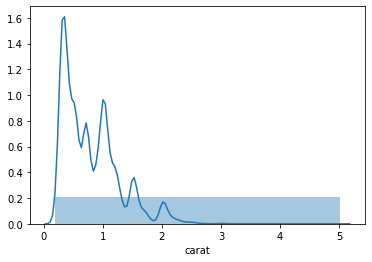

In [10]:
sns.distplot(diamond_data['carat'],kde=True, bins=1)

In [11]:
##Checking for Skewness & Kurtosis in "carat" column
from scipy.stats import kurtosis
from scipy.stats import skew
from statistics import median 

print("mean : ", np.mean(diamond_data['carat']))
print("var  : ", np.var(diamond_data['carat']))
print("Std.dev  : ", np.std(diamond_data['carat']))
print("median : ",median(diamond_data['carat']))
print("skew : ",skew(diamond_data['carat']))
print("kurt : ",kurtosis(diamond_data['carat']))

mean :  0.7979397478679852
var  :  0.22468249433034185
Std.dev  :  0.47400685050992863
median :  0.7
skew :  1.1166148681277797
kurt :  1.2564076184374766


** Note: Kurtosis is +ve and Leptokurtosis.
    Skewness is +ve i.e right skewed. 
    mean ~= median

{'whiskers': [<matplotlib.lines.Line2D at 0x2ad276a1be0>,
 'caps': [<matplotlib.lines.Line2D at 0x2ad276a1eb8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2ad276a17f0>],
 'medians': [<matplotlib.lines.Line2D at 0x2ad276a4940>],
 'fliers': [<matplotlib.lines.Line2D at 0x2ad276a4c88>],
 'means': []}

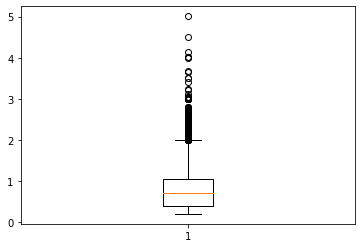

In [12]:
plt.boxplot(diamond_data['carat'])

** Note: There are lot of outliers. But there is huge chance of getting rare but large carat values in diamond. So, will not remove the outliers.

(array([3.0000e+00, 0.0000e+00, 1.1000e+01, 2.6800e+02, 1.2078e+04,
        4.0363e+04, 1.1320e+03, 7.8000e+01, 4.0000e+00, 3.0000e+00]),
 array([43. , 46.6, 50.2, 53.8, 57.4, 61. , 64.6, 68.2, 71.8, 75.4, 79. ]),
 <a list of 10 Patch objects>)

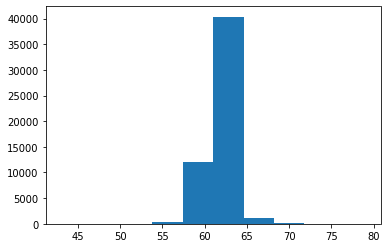

In [13]:
#Histogram of Depth
plt.hist(diamond_data['depth'])

C:\Users\Urmisha\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


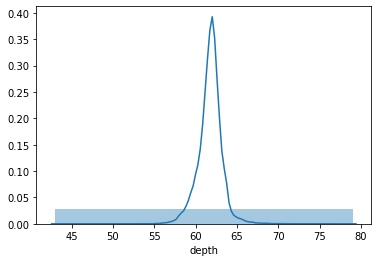

In [14]:
sns.distplot(diamond_data['depth'],kde=True, bins=1)

In [15]:
print("mean : ", np.mean(diamond_data['depth']))
print("var  : ", np.var(diamond_data['depth']))
print("Std.dev  : ", np.std(diamond_data['depth']))
print("median : ",median(diamond_data['depth']))
print("skew : ",skew(diamond_data['depth']))
print("kurt : ",kurtosis(diamond_data['depth']))

mean :  61.74940489432624
var  :  2.052365793420936
Std.dev  :  1.4326080390047153
median :  61.8
skew :  -0.08229173779627727
kurt :  5.738771345086844


** Note: Skewness is negative(Left-Skewness). Kurtosis is Leptokurtic. 
    Median > Mean, kurtosis shows extreme result and left-skewed. So, the values amust be at peak & on tails.

{'whiskers': [<matplotlib.lines.Line2D at 0x2ad279075f8>,
 'caps': [<matplotlib.lines.Line2D at 0x2ad27907c88>,
 'boxes': [<matplotlib.lines.Line2D at 0x2ad27907240>],
 'medians': [<matplotlib.lines.Line2D at 0x2ad27907f60>],
 'fliers': [<matplotlib.lines.Line2D at 0x2ad2790c6a0>],
 'means': []}

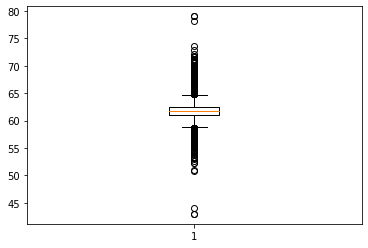

In [16]:
plt.boxplot(diamond_data['depth'])

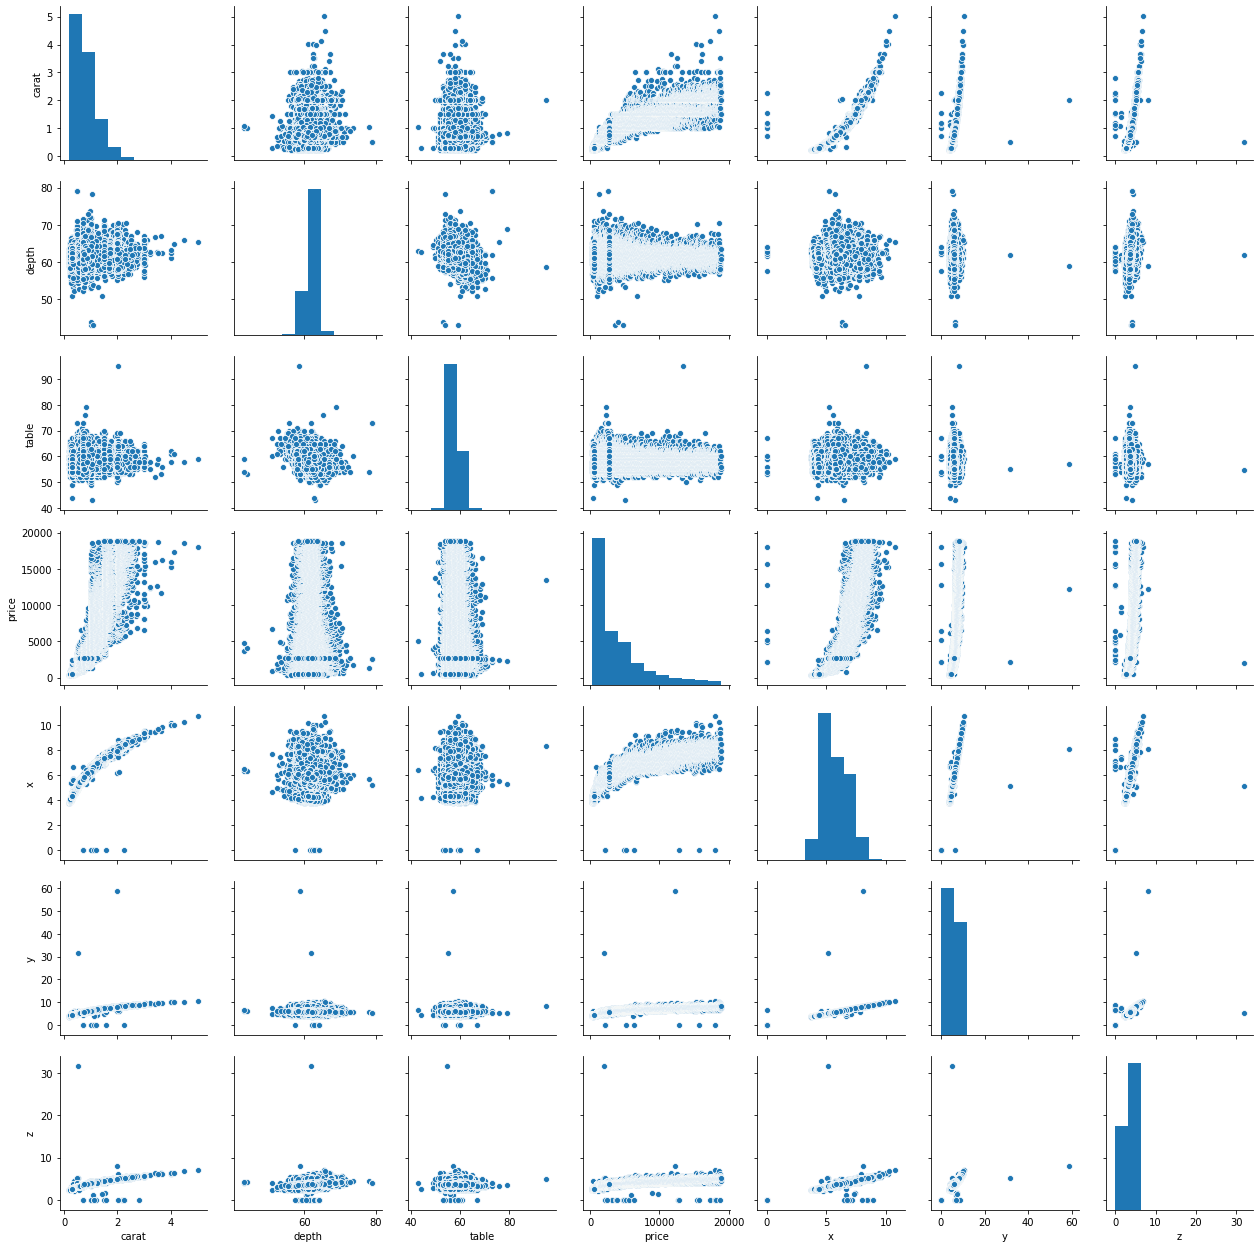

In [17]:
sns.pairplot(diamond_data)

** Note: The plot depicts, mostly the attributes are right skewed, and the scatterplot between independent variables and dependent variable'price' is not a straight linear relationship.
    The correlation between carat & X variables looks strong.

**Categorical Variables Analysis

In [18]:
#Proportion of "cut"
print(diamond_data['cut'].unique())
print(diamond_data['cut'].value_counts())

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64


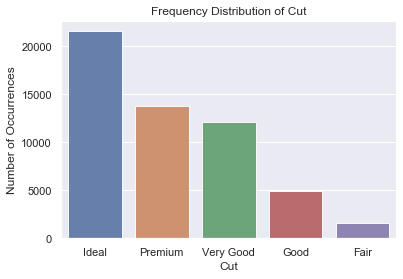

In [19]:
count = diamond_data['cut'].value_counts()
sns.set(style="darkgrid")
sns.barplot(count.index, count.values, alpha=0.9)
plt.title('Frequency Distribution of Cut')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Cut', fontsize=12)
plt.show()

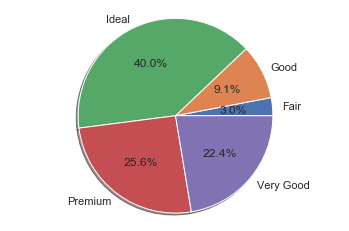

In [20]:
labels = diamond_data['cut'].astype('category').cat.categories.tolist()
counts = diamond_data['cut'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [21]:
#Proportion of "clarity"
print(diamond_data['clarity'].unique())
print(diamond_data['clarity'].value_counts())

['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64


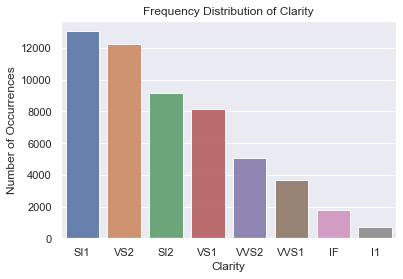

In [22]:
count = diamond_data['clarity'].value_counts()
sns.set(style="darkgrid")
sns.barplot(count.index, count.values, alpha=0.9)
plt.title('Frequency Distribution of Clarity')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Clarity', fontsize=12)
plt.show()

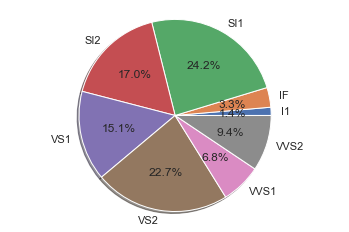

In [23]:
labels = diamond_data['clarity'].astype('category').cat.categories.tolist()
counts = diamond_data['clarity'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [24]:
#Proportion of "color"
print(diamond_data['color'].unique())
print(diamond_data['color'].value_counts())

['E' 'I' 'J' 'H' 'F' 'G' 'D']
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64


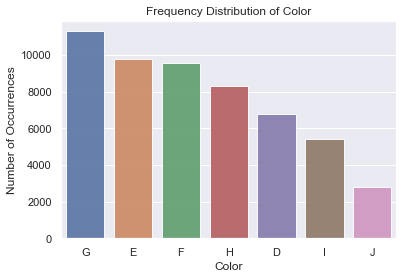

In [25]:
count = diamond_data['color'].value_counts()
sns.set(style="darkgrid")
sns.barplot(count.index, count.values, alpha=0.9)
plt.title('Frequency Distribution of Color')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Color', fontsize=12)
plt.show()

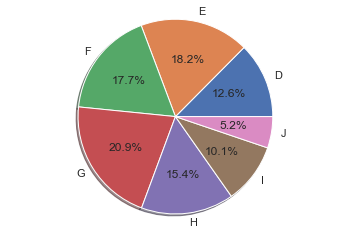

In [26]:
labels = diamond_data['color'].astype('category').cat.categories.tolist()
counts = diamond_data['color'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [27]:
#Checking for missing values
print("Checking of the null values within the dataset",diamond_data.isnull().sum())

Checking of the null values within the dataset carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


*** Note: There is no missing values in the dataset.

C:\Users\Urmisha\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


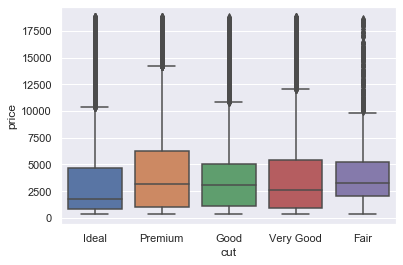

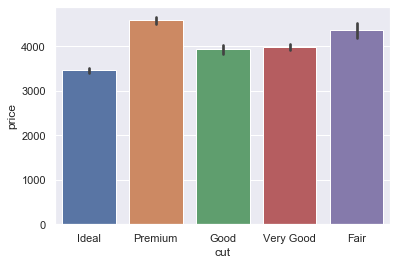

In [28]:
plt.figure(1)
sns.boxplot(x='cut', y='price',data=diamond_data)

plt.figure(2)
sns.barplot(x='cut', y='price',data=diamond_data)

plt.show()

C:\Users\Urmisha\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


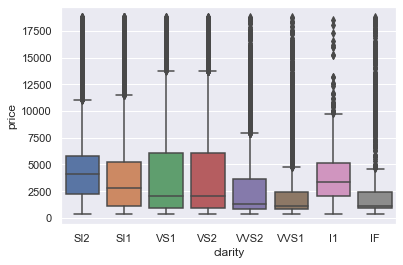

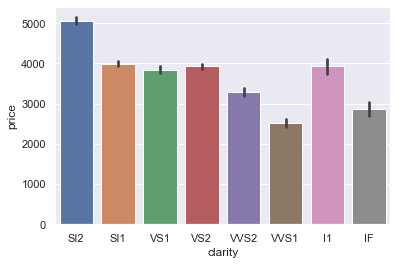

In [29]:
plt.figure(1)
sns.boxplot(x='clarity', y='price',data=diamond_data)

plt.figure(2)
sns.barplot(x='clarity', y='price',data=diamond_data)

plt.show()

C:\Users\Urmisha\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


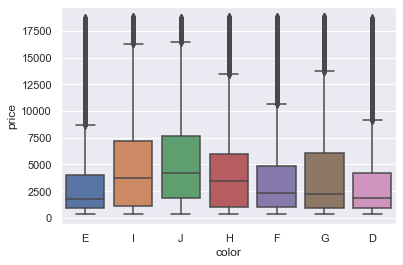

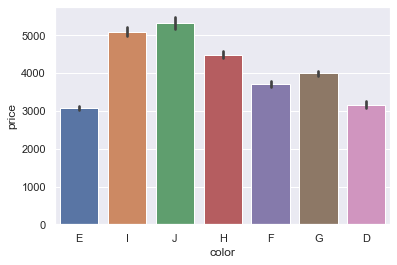

In [42]:
plt.figure(1)
sns.boxplot(x='color', y='price',data=diamond_data)

plt.figure(2)
sns.barplot(x='color', y='price',data=diamond_data)

plt.show()

** Handling the Ordinal Variables, categorical encoding

In [30]:
print(diamond_data['cut'].unique())

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']


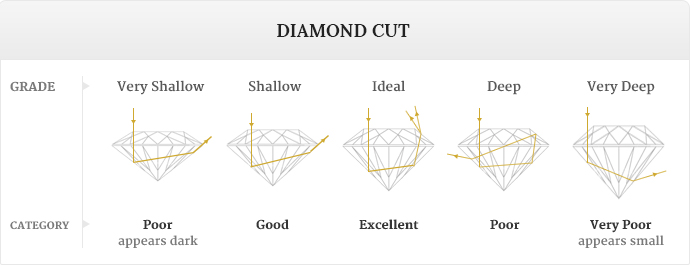

In [31]:
display.Image("C:/Users/Urmisha/Desktop/Udemy ML & AI/ML Regression Course Package/diamond_cut_chart.jpg", width=1000, height=15)

In [34]:
import category_encoders as ce
df1=pd.DataFrame(diamond_data['cut'])

# create object of Ordinalencoding
encoder= ce.OrdinalEncoder(cols=['cut'],return_df=True,
                           mapping=[{'col':'cut',
'mapping':{'Ideal':4,'Premium':3,'Fair':2,'Very Good':1,'Good':0 }}])

#Original data
df1
diamond_data['cut_transform'] = encoder.fit_transform(df1)
diamond_data.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_transform,cut_transform
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,4,4
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,3,3
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0,0
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3,3
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0,0
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,1,1
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,1,1
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53,1,1
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49,2,2
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39,1,1


*** Note: Fair<F=Good<Very Good< Premium < Ideal

In [35]:
print(diamond_data['clarity'].unique())

['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


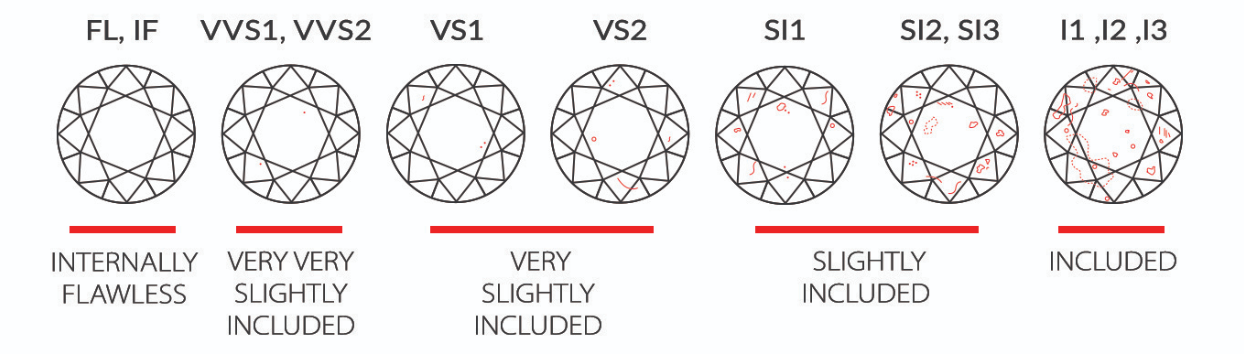

In [36]:
display.Image("C:/Users/Urmisha/Desktop/Udemy ML & AI/ML Regression Course Package/diamond-clarity-chart.png", width=1000, height=15)

In [37]:
df2=pd.DataFrame(diamond_data['clarity'])

# create object of Ordinalencoding
encoder= ce.OrdinalEncoder(cols=['clarity'],return_df=True,
                           mapping=[{'col':'clarity',
'mapping':{'I1':0,'SI1':1,'SI2':2,'VS1':3,'VS2':4,'VVS1':5, 'VVS2':6,'IF':7}}])

#Original data
df2
diamond_data['clarity_transform'] = encoder.fit_transform(df2)
diamond_data.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_transform,cut_transform
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,2,4
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1,3
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,3,0
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,4,3
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2,0
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,6,1
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,5,1
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53,1,1
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49,4,2
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39,3,1


*** Note: I1< SI1 < SI2 < VS1 < VS2 < VVS1 <VVS2 < IF

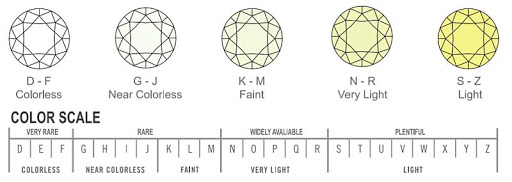

In [38]:
display.Image("C:/Users/Urmisha/Desktop/Udemy ML & AI/ML Regression Course Package/diamond_color_chart.jpg", width=1000, height=15)


In [39]:
df3=pd.DataFrame(diamond_data['color'])

# create object of Ordinalencoding
encoder= ce.OrdinalEncoder(cols=['color'],return_df=True,
                           mapping=[{'col':'color',
'mapping':{'J':0,'I':1,'H':2,'G':3,'F':4,'E':5,'D':6}}])

#Original data
df3
diamond_data['color_transform'] = encoder.fit_transform(df3)
diamond_data.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_transform,cut_transform,color_transform
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,2,4,5
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1,3,5
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,3,0,5
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,4,3,1
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2,0,0
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,6,1,0
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,5,1,1
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53,1,1,2
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49,4,2,5
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39,3,1,2


*** Note: J<I<H<G<F<E<D

In [40]:
diamond_data.columns
diamond_data.dtypes
diamond_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_transform,cut_transform,color_transform
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,2,4,5
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1,3,5
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,3,0,5
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,4,3,1
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2,0,0


In [41]:
#Correlation Matrix
diamond_data.corr()

,carat,depth,table,price,x,y,z,clarity_transform,cut_transform,color_transform
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387,-0.281999,-0.093752,-0.291437
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924,-0.068280,-0.139197,-0.047279
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929,-0.138859,-0.381058,-0.026465
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249,-0.104883,-0.039404,-0.172511
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772,-0.302139,-0.086804,-0.270287
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006,-0.291073,-0.090341,-0.263584
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000,-0.299968,-0.104711,-0.268227
clarity_transform,-0.281999,-0.068280,-0.138859,-0.104883,-0.302139,-0.291073,-0.299968,1.000000,0.139350,0.001626
cut_transform,-0.093752,-0.139197,-0.381058,-0.039404,-0.086804,-0.090341,-0.104711,0.139350,1.000000,0.006412
color_transform,-0.291437,-0.047279,-0.026465,-0.172511,-0.270287,-0.263584,-0.268227,0.001626,0.006412,1.000000


** Note: 
Strong Correlation: 
carat-x,y,z, price
price-x,y,z

In [42]:
#Covariance
diamond_data.cov()

,carat,depth,table,price,x,y,z,clarity_transform,cut_transform,color_transform
carat,0.224687,0.019167,0.192365,1.742765e+03,0.518484,0.515248,0.318917,-0.236523,-0.063171,-0.234998
depth,0.019167,2.052404,-0.946840,-6.085371e+01,-0.040641,-0.048009,0.095968,-0.173085,-0.283471,-0.115221
table,0.192365,-0.946840,4.992948,1.133318e+03,0.489643,0.468972,0.237996,-0.549022,-1.210363,-0.100597
price,1742.765364,-60.853712,1133.318064,1.591563e+07,3958.021491,3943.270810,2424.712613,-740.376722,-223.460325,-1170.737650
x,0.518484,-0.040641,0.489643,3.958021e+03,1.258347,1.248789,0.768487,-0.599714,-0.138416,-0.515770
y,0.515248,-0.048009,0.468972,3.943271e+03,1.248789,1.304472,0.767320,-0.588242,-0.146672,-0.512116
z,0.318917,0.095968,0.237996,2.424713e+03,0.768487,0.767320,0.498011,-0.374569,-0.105041,-0.321998
clarity_transform,-0.236523,-0.173085,-0.549022,-7.403767e+02,-0.599714,-0.588242,-0.374569,3.130935,0.350501,0.004894
cut_transform,-0.063171,-0.283471,-1.210363,-2.234603e+02,-0.138416,-0.146672,-0.105041,0.350501,2.020651,0.015505
color_transform,-0.234998,-0.115221,-0.100597,-1.170738e+03,-0.515770,-0.512116,-0.321998,0.004894,0.015505,2.893757


In [43]:
##Checking for multi-collinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [44]:
num_val=['carat','depth','table','x','y','z','cut_transform','clarity_transform','color_transform']
X = diamond_data[num_val].iloc[:,:]
calc_vif(X)

,variables,VIF
0,carat,73.352108
1,depth,560.944877
2,table,542.466297
3,x,1343.066182
4,y,531.430366
5,z,556.401229
6,cut_transform,4.965872
7,clarity_transform,4.485483
8,color_transform,5.526264


** Note: VIF is too high. This shows there is a presence of multi-collinearity between the independent variables.

In [45]:
#Fixing Multicollinearity --- Dropping the variables.

num_val=['carat','cut_transform','clarity_transform','color_transform']
X = diamond_data[num_val].iloc[:,:]
calc_vif(X)

,variables,VIF
0,carat,2.410564
1,cut_transform,3.846442
2,clarity_transform,3.292488
3,color_transform,3.331520


** Note: After dropping certain variables, Moderate Multicollinearity....

In [46]:
#diamond_data=diamond_data.drop(['x','y','z','table','depth'],axis=1)
diamond_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_transform,cut_transform,color_transform
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,2,4,5
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1,3,5
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,3,0,5
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,4,3,1
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2,0,0


In [47]:
#Features: After dropping certain high VIF based variables
features=['carat','cut_transform','color_transform','clarity_transform','price']
diamond=diamond_data[features]
diamond.head()

,carat,cut_transform,color_transform,clarity_transform,price
0,0.23,4,5,2,326
1,0.21,3,5,1,326
2,0.23,0,5,3,327
3,0.29,3,1,4,334
4,0.31,0,0,2,335


### Regression Model

In [48]:
#Import ML models libraries
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

**Linear Regression Model between Carat-Price

In [77]:
diamond['carat'].corr(diamond['price'])

0.921591301193476

In [49]:
from sklearn.model_selection import train_test_split 
SEED=21
# split the data into train and test sets
X=diamond.carat.values.reshape(-1,1)
y=diamond.price.values.reshape(-1,1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20, random_state=SEED)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(43152, 1)
(10788, 1)
(43152, 1)
(10788, 1)


In [50]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

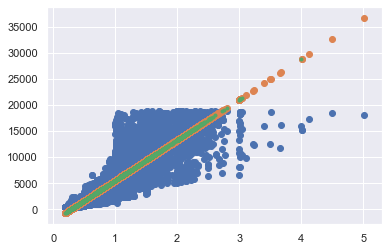

In [51]:
y_train_pred=lm.predict(X_train)
y_test_pred=lm.predict(X_test)

plt.scatter(X,y)
plt.scatter(X_train,y_train_pred)
plt.scatter(X_test,y_test_pred,marker='.')

**Evaluating the Linear Regression Model Performance

In [52]:
from sklearn.metrics import mean_squared_error
print("Training data set\n")
mse=mean_squared_error(y_train,y_train_pred)
rmse=np.sqrt(mse)
print("MSE: ",mse,"\nRMSE: ",rmse)
print("x.max:",X.max(),"\nx.min:",X.min(),"\ny.max:",y.max(),"\ny.min:",y.min())
train_error_lm=rmse

Training data set

MSE:  2410491.6541521465 
RMSE:  1552.5758126906867
x.max: 5.01 
x.min: 0.2 
y.max: 18823 
y.min: 326


In [53]:
print("\nTesting Dataset\n")
mse=mean_squared_error(y_test,y_test_pred)
rmse=np.sqrt(mse)
print("MSE: ",mse,"\nRMSE: ",rmse)
print("x.max:",X.max(),"\nx.min:",X.min(),"\ny.max:",y.max(),"\ny.min:",y.min())
test_error_lm=rmse


Testing Dataset

MSE:  2347996.3060057946 
RMSE:  1532.3172993886724
x.max: 5.01 
x.min: 0.2 
y.max: 18823 
y.min: 326


**Poynomial Regression

In [54]:
from sklearn.preprocessing import PolynomialFeatures

In [55]:
poly_reg=PolynomialFeatures(degree=2) #Degree=2
X_columns=poly_reg.fit_transform(X_train)
X_columns

array([[1.    , 0.25  , 0.0625],
       [1.    , 1.02  , 1.0404],
       [1.    , 0.27  , 0.0729],
       ...,
       [1.    , 0.93  , 0.8649],
       [1.    , 1.    , 1.    ],
       [1.    , 1.4   , 1.96  ]])

In [56]:
reg=LinearRegression()
reg.fit(X_columns,y_train)
reg.score(X_columns,y_train)
#reg.coef_
#reg.intercept_
print("Coefficient(m) of the Linear Model", reg.coef_)
print("Coefficient(b) of the Linear Model",reg.intercept_)

Coefficient(m) of the Linear Model [[   0.         6785.68460466  456.56462305]]
Coefficient(b) of the Linear Model [-1869.59623602]


Text(0.5, 1.0, 'Price vs. Carat for Diamonds(Poly Order=2)')

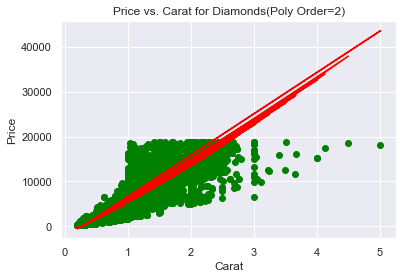

In [57]:
y_predict=reg.predict(X_columns)
#y_predict

plt.scatter(X_train,y_train, color='green')
plt.plot(X_train,y_predict,color='red')
plt.xlabel("Carat")
plt.ylabel("Price")
plt.title("Price vs. Carat for Diamonds(Poly Order=2)",fontsize=12)

Coefficient(m) of the Linear Model [[    0.          1080.21377509  5568.96919567 -1245.89523294]]
Coefficient(b) of the Linear Model [-269.21005986]


Text(0.5, 1.0, 'Price vs. Carat for Diamonds(Poly Order=3)')

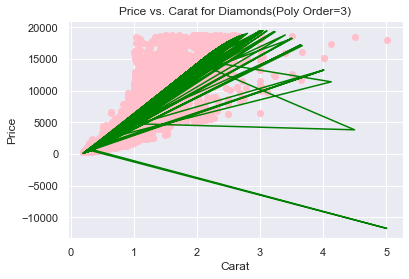

In [58]:
poly_reg=PolynomialFeatures(degree=3) #Degree=3
X_columns=poly_reg.fit_transform(X_train)
X_columns

reg=LinearRegression()
reg.fit(X_columns,y_train)
reg.score(X_columns,y_train)
#reg.coef_
#reg.intercept_
print("Coefficient(m) of the Linear Model", reg.coef_)
print("Coefficient(b) of the Linear Model",reg.intercept_)


y_predict=reg.predict(X_columns)
#y_predict

plt.scatter(X_train,y_train, color='pink')
plt.plot(X_train,y_predict,color='green')
plt.xlabel("Carat")
plt.ylabel("Price")
plt.title("Price vs. Carat for Diamonds(Poly Order=3)",fontsize=12)

Coefficient(m) of the Linear Model [[    0.         -4347.04679064 11350.15759108 -2843.48209144
   -206.86244444    78.58140527]]
Coefficient(b) of the Linear Model [1060.87397027]


Text(0.5, 1.0, 'Price vs. Carat for Diamonds(Poly Order=5)')

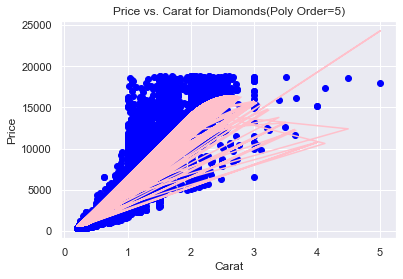

In [59]:
poly_reg=PolynomialFeatures(degree=5) #Degree=5
X_columns=poly_reg.fit_transform(X_train)
X_columns

reg=LinearRegression()
reg.fit(X_columns,y_train)
reg.score(X_columns,y_train)
#reg.coef_
#reg.intercept_
print("Coefficient(m) of the Linear Model", reg.coef_)
print("Coefficient(b) of the Linear Model",reg.intercept_)


y_predict=reg.predict(X_columns)
#y_predict

plt.scatter(X_train,y_train, color='blue')
plt.plot(X_train,y_predict,color='pink')
plt.xlabel("Carat")
plt.ylabel("Price")
plt.title("Price vs. Carat for Diamonds(Poly Order=5)",fontsize=12)

**Evaluating Polynomial Regression 

In [60]:
mse_2=mean_squared_error(X_train,y_train_pred)
rmse_2=np.sqrt(mse_2)
print("MSE: ",mse_2,"\nRMSE: ",rmse_2)
train_error_lm2=rmse_2


MSE:  29120315.009516906 
RMSE:  5396.3242127875255


In [61]:
mse_2=mean_squared_error(y_test,y_test_pred)
rmse_2=np.sqrt(mse_2)
print("MSE: ",mse_2,"\nRMSE: ",rmse_2)
test_error_lm2=rmse_2

MSE:  2347996.3060057946 
RMSE:  1532.3172993886724


**Multiple Regression Model

In [62]:
from sklearn.model_selection import train_test_split 
SEED=21
# split the data into train and test sets
X=diamond.drop(['price'],axis=1)
y=diamond['price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20, random_state=SEED)
print(X_train.shape)
print(X_test.shape)

(43152, 4)
(10788, 4)


In [63]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(43152, 4)
(10788, 4)
(43152,)
(10788,)


In [64]:
print(X_train.head())
print(y_train.head())

       carat  cut_transform  color_transform  clarity_transform
45635   0.25              1                3                  5
13666   1.02              3                3                  4
30941   0.27              1                5                  4
3301    0.90              1                4                  2
29782   0.30              4                6                  1
45635     525
13666    5593
30941     449
3301     3368
29782     709
Name: price, dtype: int64


In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

Coefficient(m) of the Linear Model [8492.21262138   85.19732618  282.67012502  394.98592822]
Coefficient(b) of the Linear Model -5245.620863559179


Text(0.5, 1.0, 'Multiple Linear Regression Model')

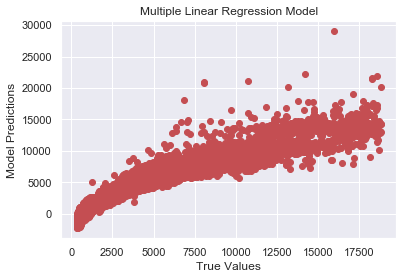

In [66]:
reg=LinearRegression(fit_intercept=True, normalize=True).fit(X_train,y_train) 
#If False then the line must pass from the origin and b=0 in y=mx+b eqn.
reg.score(X_train,y_train)
#reg.coef_
#reg.intercept_
print("Coefficient(m) of the Linear Model", reg.coef_)
print("Coefficient(b) of the Linear Model",reg.intercept_)

#Test the model
y_predict=reg.predict(X_test)
#y_predict


plt.scatter(y_test,y_predict,color='r')
plt.ylabel("Model Predictions")
plt.xlabel("True Values")
plt.title("Multiple Linear Regression Model")

In [67]:
k=X_test.shape[1]
n=len(X_test)

**Evaluation of Multiple Regression Model

In [68]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from math import sqrt

RMSE=float(format(np.sqrt(mean_squared_error(y_test,y_predict)), '.3f'))
MSE=format(mean_squared_error(y_test,y_predict),'.3f')
MAE=format(mean_absolute_error(y_test,y_predict),'.3f')
R_Square= r2_score(y_test,y_predict)
Adj_Rsq=1-(1-R_Square)*(n-1)/(n-k-1)
MAPE=np.mean(np.abs((y_test-y_predict)/y_test))*100

print("RMSE=", RMSE, "\nMSE=",MSE, "\nMAE=",MAE, "\nR_Sq=",R_Square , "\nAdj_Rsq=",Adj_Rsq,"\nMAPE=",MAPE)

RMSE= 1305.443 
MSE= 1704181.134 
MAE= 888.152 
R_Sq= 0.8902108856648882 
Adj_Rsq= 0.8901701589230407 
MAPE= 45.38086763011693


In [69]:
#Train Data
mse=mean_squared_error(y_train,y_train_pred)
rmse=np.sqrt(mse)
print("MSE: ",mse,"\nRMSE: ",rmse)

train_error_lm3=rmse

MSE:  2410491.6541521465 
RMSE:  1552.5758126906867


In [70]:
#Test Data
mse_3=mean_squared_error(y_test,y_test_pred)
rmse_3=np.sqrt(mse_3)
print("MSE: ",mse_3,"\nRMSE: ",rmse_3)
test_error_lm3=rmse_3

MSE:  2347996.3060057946 
RMSE:  1532.3172993886724


**Performance Analysis

In [71]:
train_error=[train_error_lm,train_error_lm2,train_error_lm3]
test_error=[test_error_lm,test_error_lm2,test_error_lm3]

col={'Train Error':train_error,'Test Error':test_error}
models=['Linear Regression','Polynomial Regression','Multiple Regression']
df=pd.DataFrame(data=col,index=models)
df

,Train Error,Test Error
Linear Regression,1552.575813,1532.317299
Polynomial Regression,5396.324213,1532.317299
Multiple Regression,1552.575813,1532.317299


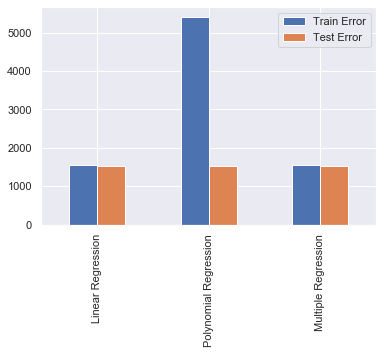

In [72]:
df.plot(kind='bar')

In [73]:
train_error=[train_error_lm,train_error_lm3]
test_error=[test_error_lm,test_error_lm3]

col={'Train Error':train_error,'Test Error':test_error}
models=['Linear Regression','Multiple Regression']
df=pd.DataFrame(data=col,index=models)
df

,Train Error,Test Error
Linear Regression,1552.575813,1532.317299
Multiple Regression,1552.575813,1532.317299


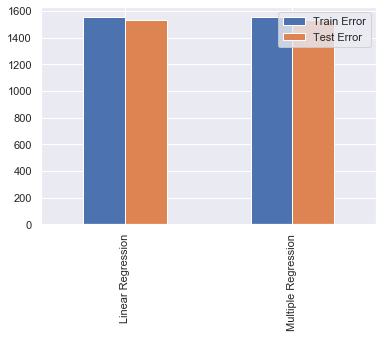

In [74]:
df.plot(kind='bar')

**Note: The Linear Regression Model & Multiple Regression model shows same results.This reflects the strong relation of carat and price of the diamond i.e. above 90%

***SUMMARY

* From the analysis, it shows the price of the diamond depends stronly on size of the diamond "carat". If carat value is more than price of the diamond will also high to be expected.
* There is no such strong evidence that shows other factors influencing the price of the dimaond. ie. "Cut", "Clarity" or "Color" of the diamond. But somewhat negative but weak relation is seen between price and color of the diamond.